In [17]:
from plotTDP import *
from cnn_predictor import CNN_Predictor
from early_tdp import *
import time

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
W_list = [
    "2TGLXRTZ",
    "3ZH607HZ",
    "3ZH61Z0Z",
    "3ZH609ZZ",
    "2TGLYS7Z",
    "3ZH61PWZ",
    "3ZH5Z5XZ",
    "3ZH620SZ",
    "3ZH6200Z",
    "3ZH5X4UZ",
    "3ZH5LL0Z",
    "2TGLXTRZ"
]

R_list = [
    "2GJ5BMAD",
    "2TGLU8RZ"
]

V_list = [
    "2GG02VGL",
    "2GH2KP7S",
    "2GHR65SS",
    "2GJ2XK9S",
    "2GJ3R6SD",
    "2GJ68Y3S",
    "2TGLJDWZ",
    "2GJ69HJS",
    "3ZH4NYAZ",
    "ZGG0AABA",
]

In [11]:
# model_path = r"C:\Users\1000303969\OneDrive - Western Digital\work\tdp classification\models\best_sequencer2d_m.in1k_all_v1_noNorm.pt"
model_path = r"C:\Users\1000303969\OneDrive - Western Digital\work\tdp classification\models\best_resnet18d_all_noNorm_kv1_fold3.pt"
# model_path = r"C:\Users\1000303969\OneDrive - Western Digital\work\tdp classification\models\models_cuda\best_sequencer2d_s.in1k_all_noNorm_kv1_cuda_fold3.pt"
# model_path = r"C:\Users\1000303969\OneDrive - Western Digital\work\tdp classification\code\tdp_production\production_models\best_sequencer2d_s.in1k_normal_inc_dec_v1_noNorm_cuda.pt"
predictor = CNN_Predictor(model_path=model_path)
model = predictor.load_model()
print(predictor.chpt['class_to_idx'])
print(predictor.chpt["transform"])

{'airmix_helium_leak_full': 0, 'delta_od_id': 1, 'high_decrease': 2, 'high_od+id': 3, 'high_recovery': 4, 'high_tdp': 5, 'low_increase': 6, 'low_recovery': 7, 'low_tdp': 8, 'normal_ID-OD': 9, 'normal_OD-ID': 10, 'normal_decrease': 11, 'normal_increase': 12, 'other_all': 13, 'revert': 14}
Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
    ToTensor()
)


['0000' '6FPV']
not split ec


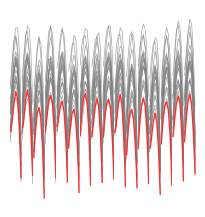

time1:  0.7591040134429932
time2:  0.1425623893737793
2GHYLKTW 11
{'class': ['low_tdp', 'normal_ID-OD', 'other_all'], 'confidence': [59.09, 16.8, 8.47]}
{'head': [11], 'TDP_level': ['normal'], 'TDP_change': ['no'], 'TDP_early': ['no']}


In [18]:
from PIL import Image

# csv_path = r"C:\Users\1000303969\OneDrive - Western Digital\work\tdp classification\VL_TDP\6FPW\TDP_6FPW.csv"
# csv_path = r"C:\Users\1000303969\OneDrive - Western Digital\work\tdp classification\VL_TDP\6FPR\TDP_6FPR.csv"
# csv_path = r"C:\Users\1000303969\OneDrive - Western Digital\work\tdp classification\VL_TDP\6FPV\TDP_6FPV_R_W.csv"
hddsn = "2GHYLKTW"
csv_path = f"C:/Users/1000303969\OneDrive - Western Digital/work/tdp classification/VL_TDP/6FPV_v2/TDP_{hddsn}.csv"

split_ec = False

df = pd.read_csv(csv_path)
ec = df["pfcode"].unique()
print(ec)

if split_ec:
    if ("6FPR" in ec) and ("6FPV" not in ec):
        hddsn_list = R_list
    elif "6FPW" in ec:
        hddsn_list = W_list
    else:
        hddsn_list = V_list
else:
    print("not split ec")
    hddsn_list = df["hddsn"].unique()

for hddsn in hddsn_list:
    df_filter = df[df["hddsn"] == hddsn]
    failure_head_list = get_bad_head(df=df_filter)
    n_fh = len(failure_head_list)
    for fh_i in range(n_fh):
        st1 = time.time()
        tdp = TDP(df=df_filter, bad_head_list=[failure_head_list[fh_i]])
        fig = tdp.display()
        plt.show()
        result = predictor.predict(model, fig, is_path=False)
        end1 = time.time()
        print("time1: ", end1 - st1)
        st2 = time.time()
        obj = EARLY_TDP(df=df_filter, bad_head_list=[failure_head_list[fh_i]])
        symptom = obj.run()
        end2 = time.time()
        print("time2: ", end2 - st2)
        print(hddsn, failure_head_list[fh_i])
        print(result)
        print(symptom)  
        print("==================================================")

# hddsn_filter = "3ZH5Z5XZ"
# df_filter = df[df["hddsn"] == hddsn_filter]
# failure_head_list = get_bad_head(df=df_filter)
# print(failure_head_list)
# tdp = TDP(df=df_filter, bad_head_list=failure_head_list)
# fig = tdp.display()
# plt.show()

# obj = EARLY_TDP(df=df_filter, bad_head_list=failure_head_list)
# symptom = obj.run()
# print(symptom)

# result = predictor.predict(model, fig)
# fig2 = predictor.convert_to_arr(fig)

# result = predictor.predict(model, fig, is_path=False)
# print(result)

In [49]:
test_dict = {
        'high_tdp': 51.25, 
        'assembly': 96.16, 
        'other_increase_decrease': 99.85, 
        'other_recovery': 99.99, 
        'other_hl_inc_dec': 80.33, 
        'head': [13],
        "early_tdp_flag": ['yes'],
}

In [52]:
other_counter = 0
all_keys = list(test_dict.keys())
n_all_keys = len(all_keys)

other_flag = False
other_dict = {}
non_other_dict = {}

for key, value in test_dict.items():
    if "head" in key or "early_tdp_flag" in key:
        continue

    if "other" in key:
        other_counter += 1
        other_dict[key] = value
    else:
        non_other_dict[key] = value

    if other_counter == n_all_keys - 1:
        other_flag = True
        # print(other_dict)
        break
    
if other_flag:
    new_dict = {}
    new_dict["ealry_tdp_flag"] = test_dict["early_tdp_flag"]

    avg_other_confi  = np.mean(list(other_dict.values()))
    new_dict["other"] = avg_other_confi
    new_dict["head"] = test_dict["head"]
    print(new_dict)
else:
    sorted_confidence = sorted(non_other_dict.values(), reverse=True)

    new_dict = {}
    temp_list = []

    for confi in sorted_confidence:
        for key, value in non_other_dict.items():
            if confi == value:
                temp_list.append(key)

    new_dict["head"] = test_dict["head"]
    new_dict["class"] = temp_list
    new_dict["confidence"] = [sorted_confidence[0]]
    new_dict["ealry_tdp_flag"] = test_dict["early_tdp_flag"]
    print(new_dict)

{'head': [13], 'class': ['assembly', 'high_tdp'], 'confidence': [96.16], 'ealry_tdp_flag': ['yes']}


In [20]:
from urllib.request import urlopen
from PIL import Image
import timm
import torch

img = Image.open(urlopen(
    'https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/beignets-task-guide.png'
))

model = timm.create_model('sequencer2d_l.in1k', pretrained=True)
model = model.eval()

# get model specific transforms (normalization, resize)
data_config = timm.data.resolve_model_data_config(model)
transforms = timm.data.create_transform(**data_config, is_training=False)

transforms

Compose(
    Resize(size=256, interpolation=bicubic, max_size=None, antialias=None)
    CenterCrop(size=(224, 224))
    ToTensor()
    Normalize(mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]))
)

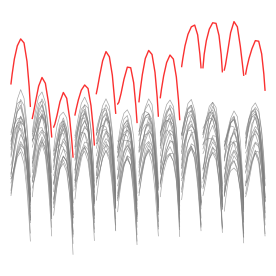

In [38]:
fig